# Lesson 4. More Data, More Maps!

Now that we know how to pull in data, check and transform Coordinate Reference Systems (CRS), and plot GeoDataFrames together - let's practice doing the same thing with other geometry types. In this notebook we'll be bringing in bike boulevards and schools, which will get us primed to think about spatial relationship questions.

- 4.1 Berkeley Bike Boulevards
- 4.2 Alameda County Schools
- **Exercise**: Even More Data!
- 4.3 Map Overlays with Matplotlib
- 4.4 Recap
- **Exercise**: Overlay Mapping
- 4.5 Teaser for Day 2


<br>
<font color='grey'>
    <b>Instructor Notes</b>

- Datasets used
    - 'notebook_data/transportation/BerkeleyBikeBlvds.geojson'
    - 'notebook_data/alco_schools.csv'
    - 'notebook_data/parcels/parcel_pts_rand30pct.geojson'
    - ‘notebook_data/berkeley/BerkeleyCityLimits.shp’

- Expected time to complete
    - Lecture + Questions: 30 minutes
    - Exercises: 20 minutes
</font>

### Import Libraries

In [1]:
import pandas as pd
import geopandas as gpd

import matplotlib # base python plotting library
import matplotlib.pyplot as plt # submodule of matplotlib

# To display plots, maps, charts etc in the notebook
%matplotlib inline  

## 4.1 Berkeley Bike Boulevards

We're going to bring in data bike boulevards in Berkeley. Note two things that are different from our previous data:
- We're bringing in a [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON) this time and not a shapefile
- We have a **line** geometry GeoDataFrame (our county and states data had **polygon** geometries)

<AxesSubplot:>

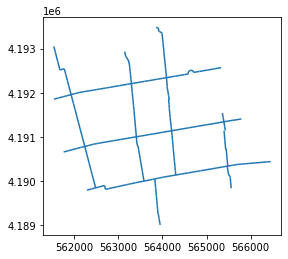

In [2]:
bike_blvds = gpd.read_file('notebook_data/transportation/BerkeleyBikeBlvds.geojson')
bike_blvds.plot()

As usual, we'll want to do our usual data exploration...

In [3]:
bike_blvds.head()

,BB_STRNAM,BB_STRID,BB_FRO,BB_TO,BB_SECID,DIR_,Status,ALT_bikeCA,Shape_len,len_km,geometry
0,Heinz/Russell,RUS,7th,8th,RUS01,E/W,Existing,No,101.128166,0.101,"MULTILINESTRING ((562293.786 4189795.092, 5623..."
1,Heinz/Russell,RUS,8th,9th,RUS02,E/W,Ezisting,No,100.814072,0.101,"MULTILINESTRING ((562391.553 4189820.949, 5624..."
2,Heinz/Russell,RUS,9th,10th,RUS03,E/W,Existing,No,100.037396,0.100,"MULTILINESTRING ((562489.017 4189846.721, 5625..."
3,Heinz/Russell,RUS,10th,San Pablo,RUS04,E/W,Existing,No,106.592878,0.107,"MULTILINESTRING ((562585.723 4189872.321, 5626..."
4,San Pablo,RUS,Heinz,Russell,RUS05,N/S,Existing,No,89.563478,0.090,"MULTILINESTRING ((562688.854 4189899.267, 5627..."


In [4]:
bike_blvds.shape

(211, 11)

In [5]:
bike_blvds.columns

Index(['BB_STRNAM', 'BB_STRID', 'BB_FRO', 'BB_TO', 'BB_SECID', 'DIR_',
       'Status', 'ALT_bikeCA', 'Shape_len', 'len_km', 'geometry'],
      dtype='object')

Our bike boulevard data includes the following information:
 - `BB_STRNAM` - bike boulevard Streetname
 - `BB_STRID` - bike boulevard Street ID
 - `BB_FRO` - bike boulevard origin street
 - `BB_TO` - bike boulevard end street
 - `BB_SECID`- bike boulevard section id
 - `DIR_` - cardinal directions the bike boulevard runs
 - `Status` - status on whether the bike boulevard exists
 - `ALT_bikeCA` - ? 
 - `Shape_len` - length of the boulevard in meters 
 - `len_km` - length of the boulevard in kilometers
 - `geometry`


<div style="display:inline-block;vertical-align:top;">
    <img src="http://www.pngall.com/wp-content/uploads/2016/03/Light-Bulb-Free-PNG-Image.png" width="30" align=left > 
</div>  
<div style="display:inline-block;">

#### Question
</div>

Why are there 211 features when we only have 8 bike boulevards?

And now take a look at our CRS...

In [6]:
bike_blvds.crs

<Projected CRS: EPSG:32610>
Name: WGS 84 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 126°W to 120°W - by country
- bounds: (-126.0, 0.0, -120.0, 84.0)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Let's tranform our CRS to UTM Zone 10N, NAD83 that we used in the last lesson.

In [7]:
bike_blvds_utm10 = bike_blvds.to_crs( "epsg:26910")

In [8]:
bike_blvds_utm10.head()

,BB_STRNAM,BB_STRID,BB_FRO,BB_TO,BB_SECID,DIR_,Status,ALT_bikeCA,Shape_len,len_km,geometry
0,Heinz/Russell,RUS,7th,8th,RUS01,E/W,Existing,No,101.128166,0.101,"MULTILINESTRING ((562293.837 4189794.938, 5623..."
1,Heinz/Russell,RUS,8th,9th,RUS02,E/W,Ezisting,No,100.814072,0.101,"MULTILINESTRING ((562391.603 4189820.796, 5624..."
2,Heinz/Russell,RUS,9th,10th,RUS03,E/W,Existing,No,100.037396,0.100,"MULTILINESTRING ((562489.067 4189846.568, 5625..."
3,Heinz/Russell,RUS,10th,San Pablo,RUS04,E/W,Existing,No,106.592878,0.107,"MULTILINESTRING ((562585.773 4189872.168, 5626..."
4,San Pablo,RUS,Heinz,Russell,RUS05,N/S,Existing,No,89.563478,0.090,"MULTILINESTRING ((562688.904 4189899.113, 5627..."


## 4.2 Alameda County Schools

Alright! Now that we have our bike boulevard data squared away, we're going to bring in our Alameda County school data.

In [9]:
schools_df = pd.read_csv('notebook_data/alco_schools.csv')
schools_df.head()

,X,Y,Site,Address,City,State,Type,API,Org
0,-122.238761,37.744764,Amelia Earhart Elementary,400 Packet Landing Rd,Alameda,CA,ES,933,Public
1,-122.251856,37.738999,Bay Farm Elementary,200 Aughinbaugh Way,Alameda,CA,ES,932,Public
2,-122.258915,37.762058,Donald D. Lum Elementary,1801 Sandcreek Way,Alameda,CA,ES,853,Public
3,-122.234841,37.765250,Edison Elementary,2700 Buena Vista Ave,Alameda,CA,ES,927,Public
4,-122.238078,37.753964,Frank Otis Elementary,3010 Fillmore St,Alameda,CA,ES,894,Public


In [10]:
schools_df.shape

(550, 9)

<img src="http://www.pngall.com/wp-content/uploads/2016/03/Light-Bulb-Free-PNG-Image.png" width="20" align=left >  **Questions** 

Without looking ahead:

1. Is this a geodataframe? 
2. How do you know?



<br>
<br>
This is not a GeoDataFrame! A couple of clues to figure that out are..

1. We're pulling in a Comma Separated Value (CSV) file, which is not a geospatial data format
2. There is no geometry column (although we do have latitude and longitude values)


-------------------------------

Although our school data is not starting off as a GeoDataFrame, we actually have the tools and information to make it one. Using the `gpd.GeoDataFrame` constructor, we can transform our plain DataFrame into a GeoDataFrame (specifying the geometry information and then the CRS).

In [11]:
schools_gdf = gpd.GeoDataFrame(schools_df, 
                               geometry=gpd.points_from_xy(schools_df.X, schools_df.Y))
schools_gdf.crs = "epsg:4326"
schools_gdf.head()

,X,Y,Site,Address,City,State,Type,API,Org,geometry
0,-122.238761,37.744764,Amelia Earhart Elementary,400 Packet Landing Rd,Alameda,CA,ES,933,Public,POINT (-122.23876 37.74476)
1,-122.251856,37.738999,Bay Farm Elementary,200 Aughinbaugh Way,Alameda,CA,ES,932,Public,POINT (-122.25186 37.73900)
2,-122.258915,37.762058,Donald D. Lum Elementary,1801 Sandcreek Way,Alameda,CA,ES,853,Public,POINT (-122.25892 37.76206)
3,-122.234841,37.765250,Edison Elementary,2700 Buena Vista Ave,Alameda,CA,ES,927,Public,POINT (-122.23484 37.76525)
4,-122.238078,37.753964,Frank Otis Elementary,3010 Fillmore St,Alameda,CA,ES,894,Public,POINT (-122.23808 37.75396)


You'll notice that the shape is the same from what we had as a dataframe, just with the added `geometry` column.

In [12]:
schools_gdf.shape

(550, 10)

And with it being a GeoDataFrame, we can plot it as we did for our other data sets.
Notice that we have our first **point** geometry GeoDataFrame.

<AxesSubplot:>

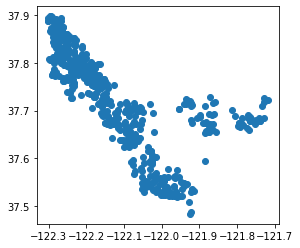

In [13]:
schools_gdf.plot()

But of course we'll want to transform the CRS, so that we can later plot it with our bike boulevard data.

<AxesSubplot:>

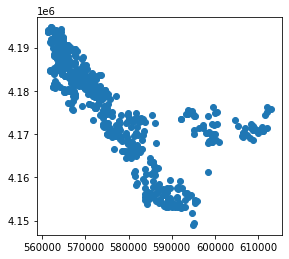

In [14]:
schools_gdf_utm10 = schools_gdf.to_crs( "epsg:26910")
schools_gdf_utm10.plot()

*In Lesson 2 we discussed that you can save out GeoDataFrames in multiple file formats. You could opt for a GeoJSON, a shapefile, etc... for point data sets it is also an option to save it out as a CSV since the geometry isn't complicated*

## Exercise: Even More Data!
Let's play around with another point GeoDataFrame.

In the code cell provided below, compose code to:

1. Read in the parcel points data (`notebook_data/parcels/parcel_pts_rand30pct.geojson`)
1. Set the CRS to be 4326
1. Transform the CRS to 26910
1. Plot and customize as desired!

To see the solution, double-click the Markdown cell below.

In [15]:
# YOUR CODE HERE:






## Double-click to see solution!

<!--

# SOLUTION
# 1. Read in the parcel points data ('notebook_data/parcels/parcel_pts_rand30pct.geojson')
parcel_pts_gdf = gpd.read_file('notebook_data/parcels/parcel_pts_rand30pct.geojson')
parcel_pts_gdf.head()
# 2. Transform CRS to EPSG code 4326 if need be
parcel_pts_gdf.crs
parcel_pts_gdf.crs = "epsg:4326"
parcel_pts_gdf_utm10 = parcel_pts_gdf.to_crs("epsg:26910")

# 3. Plot and customize!
parcel_pts_gdf.plot(markersize=5, color='violet', edgecolor='black',
                          linewidth=0.5, alpha=0.3, figsize=[6,6])
parcel_pts_gdf_utm10.plot(markersize=5, color='limegreen', edgecolor='black',
                          linewidth=0.5, alpha=0.3, figsize=[6,6])

-->

-------------------------

## 4.3 Map Overlays with Matplotlib

No matter the geometry type we have for our GeoDataFrame, we can create overlay plots.

Since we've already done the legwork of transforming our CRS, we can go ahead and plot them together.

<AxesSubplot:>

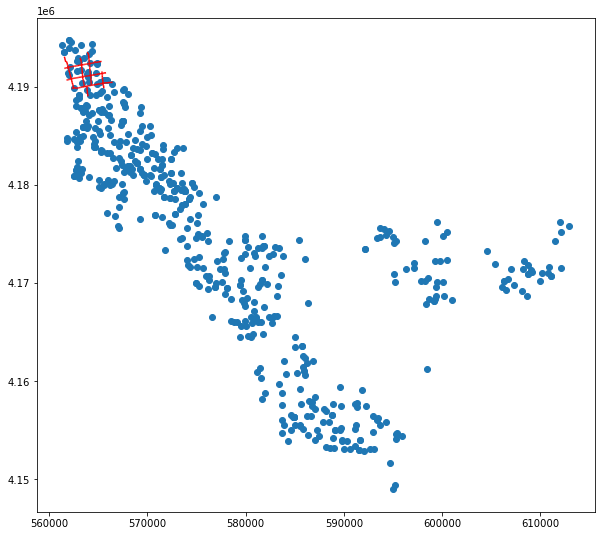

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
bike_blvds_utm10.plot(ax=ax, color='red')
schools_gdf_utm10 .plot(ax=ax)

If we want to answer questions like *"What schools are close to bike boulevards in Berkeley?"*, the above plot isn't super helpful, since the extent covers all of Alameda county.

Luckily, GeoDataFrames have an easy method to extract the minimium and maximum values for both x and y, so we can use that information to set the bounds for our plot.

In [17]:
minx, miny, maxx, maxy = bike_blvds.total_bounds
print(minx, miny, maxx, maxy)

561541.1531499997 4189007.11635 566451.5549499998 4193483.09445


Using `xlim` and `ylim` we can zoom in to see if there are schools proximal to the bike boulevards.

(4189007.11635, 4193483.09445)

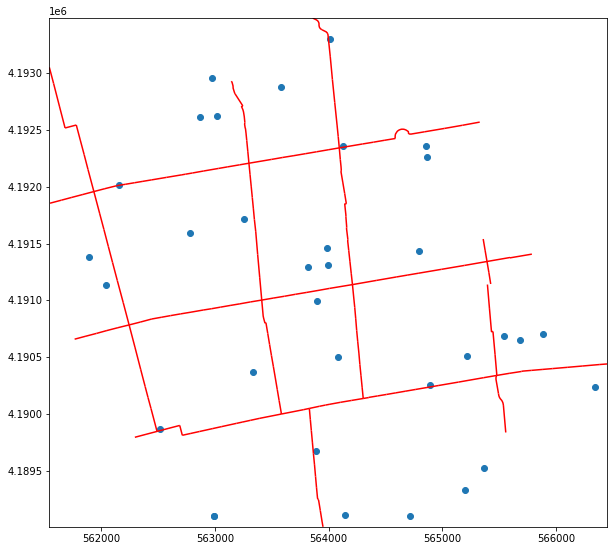

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
bike_blvds_utm10.plot(ax=ax, color='red')
schools_gdf_utm10 .plot(ax=ax)
plt.xlim(minx, maxx)
plt.ylim(miny, maxy)

## 4.4 Recap

In this lesson we learned a several new skills:
- Transformed an a-spatial dataframe into a geospatial one
    - `gpd.GeoDataFrame`
- Worked with point and line GeoDataFrames
- Overlayed point and line GeoDataFrames
- Limited the extent of a map
    - `total_bounds`


## Exercise: Overlay Mapping

Let's take some time to practice reading in and reconciling new datasets, then mapping them together.

In the code cell provided below, write code to:

1. Bring in your Berkeley places shapefile (and don't forget to check/transform the crs!) (`notebook_data/berkeley/BerkeleyCityLimits.shp`)
1. Overlay the parcel points on top of the bike boulevards
1. Create the same plot but limit it to the extent of Berkeley city limits

***BONUS***: *Add the Berkeley outline to your last plot!*

To see the solution, double-click the Markdown cell below.

In [19]:
# YOUR CODE HERE:





## Double-click the see the solution!

<!--

# SOLUTION

# 1. Bring in your Berkeley places shapefile
berkeley_places = gpd.read_file("notebook_data/berkeley/BerkeleyCityLimits.shp")
berkeley_places.crs
berkeley_places_utm10 = berkeley_places.to_crs("epsg:26910")

# 2. Overlay the parcel points on top of the bike boulevards
fig, ax = plt.subplots(figsize=(10,10))
bike_blvds_utm10.plot(ax=ax, color='black')
parcel_pts_gdf_utm10.plot(ax=ax, color='orange', markersize=5)

# 3. Create the same plot but limit it to the extent of Berkeley cit limits
minx, miny, maxx, maxy = berkeley_places_utm10.total_bounds
fig, ax = plt.subplots(figsize=(10,10))
bike_blvds_utm10.plot(ax=ax, color='black')
parcel_pts_gdf_utm10.plot(ax=ax, color='orange', markersize=5)
plt.xlim(minx, maxx)
plt.ylim(miny, maxy)


# BONUS: Add the Berkeley outline to your last plot
fig, ax = plt.subplots(figsize=(10,10))
berkeley_places_utm10.plot(ax=ax, color='grey')
bike_blvds_utm10.plot(ax=ax, color='black')
parcel_pts_gdf_utm10.plot(ax=ax, color='orange', markersize=5)
plt.xlim(minx, maxx)
plt.ylim(miny, maxy)

-->

-----------------------------------

## 4.5 Teaser for Day 2...

You may be wondering if and how we could make our maps more interesting and informative than this.

To give you a tantalizing taste of Day 2, the answer is: Yes, we can! And here's how!

Text(0.5, 1.0, 'Public and Private Schools, Alameda County')

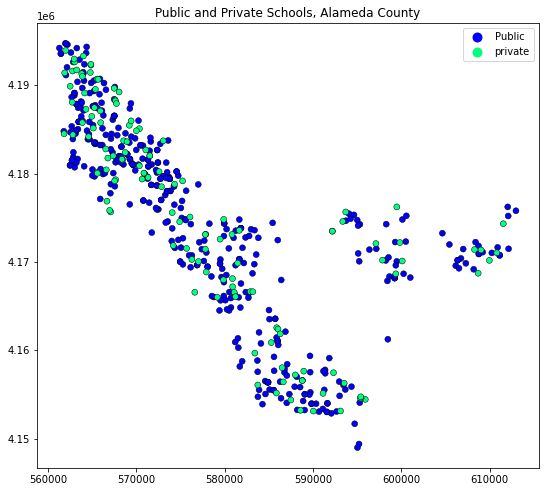

In [20]:
ax = schools_gdf_utm10.plot(column='Org', cmap='winter', 
                               markersize=35, edgecolor='black',
                               linewidth=0.5, alpha=1, figsize=[9, 9],
                               legend=True)
ax.set_title('Public and Private Schools, Alameda County')

---
<div style="display:inline-block;vertical-align:middle;">
<a href="https://dlab.berkeley.edu/" target="_blank"><img src ="assets/images/dlab_logo.png" width="75" align="left">
</a>
</div>

<div style="display:inline-block;vertical-align:middle;">
    <div style="font-size:larger">&nbsp;D-Lab @ University of California - Berkeley</div>
    <div>&nbsp;Team Geo<div>
</div>
        


